In [39]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Linear Regression Example

**Remember the demo from the first week of class looking at the text "Little Women"?**

In [40]:
little_women = Table.read_table('little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.show(3)

Periods,Characters
189,21759
188,22148
231,20558


In [41]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

# Below, t is a table; x and y are column indices or labels.

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

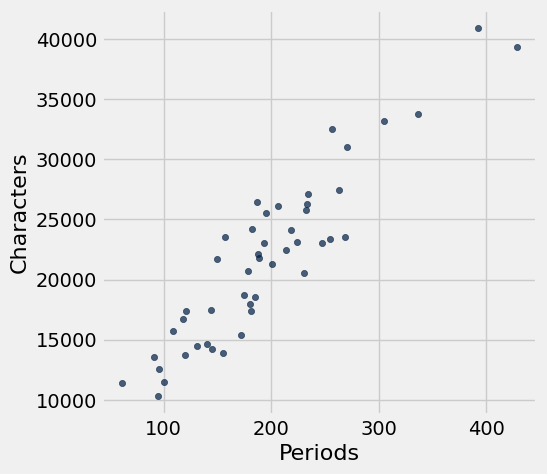

In [42]:
little_women.scatter(0, 1)

In [43]:
correlation(little_women, 0, 1)

0.92295768958548163

Let's use our functions to find the slope and intercept of the regression line for the relationship between number of characters and number of periods.

In [44]:
a = slope(little_women, 0, 1)
b = intercept(little_women, 0, 1)
#slope * given value of x + intercept
a * little_women.column(0) + b

array([ 21183.59679439,  21096.61895313,  24836.66612724,  21705.46384194,
        26924.13431744,  16921.68257274,  16138.88200141,  23358.04282585,
        34056.31730062,  20835.68542936,  21531.50815943,  42058.27869638,
        19965.90701678,  20400.79622307,  20487.77406433,  19704.973493  ,
        18226.35019161,  17269.59393777,  15269.10358883,  17356.57177903,
        28141.82409506,  15182.12574757,  26228.31158737,  20574.75190559,
        12659.76835108,  17791.46098532,  14225.36949373,  28315.77977757,
        25010.62180976,  23705.95419088,  20226.84054055,  24227.82123843,
        24923.6439685 ,  27098.08999996,  22227.33088949,  13442.5689224 ,
        18400.30587413,  22662.22009578,  27619.95704751,  10050.43311333,
        21009.64111188,  15008.17006505,  31273.02638036,  13007.67971611,
        13094.65755737,  25097.59965102,  38840.09856983])

In [45]:
def linear_fit(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a* t.column(x)+b

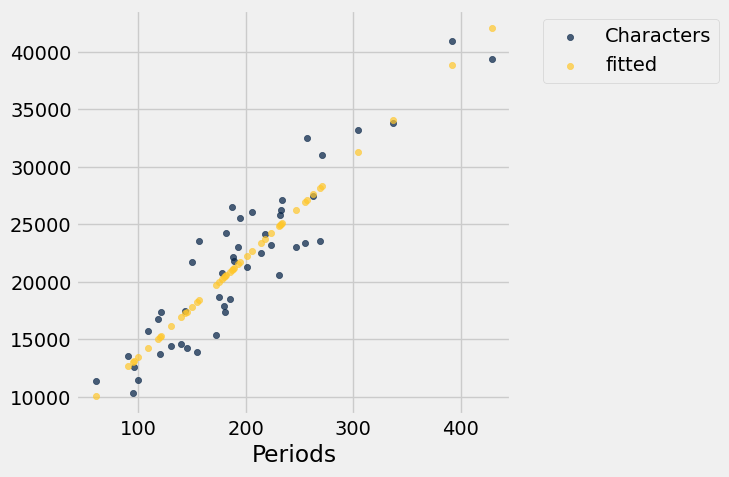

In [46]:
lw_fitted = little_women.with_column(
    'fitted',
    linear_fit(little_women, 0, 1)
)
lw_fitted.scatter(0)

...back to slides

### Squared Error

In [47]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]

In [48]:
def lw_errors(slope, intercept):
    print('Slope:    ', np.round(slope), 'characters per period')
    print('Intercept:', np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:     50 characters per period
Intercept: 1000 characters


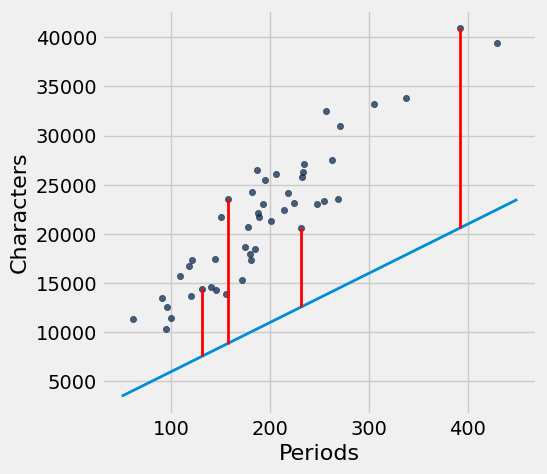

In [49]:
lw_errors(50, 1000)

Slope:     -50 characters per period
Intercept: 20000 characters


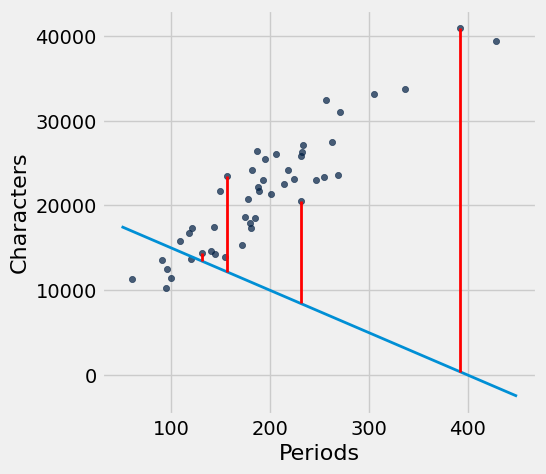

In [50]:
lw_errors(-50, 20000)

Let's Use Root Mean Square Error to Measure How Far Off

To measure the rough size of the errors using rmse
1. Square the errors to eliminate cancellation
2. Take the mean of the squared errors
3. Take the square root to fix the units

In [51]:
def lw_rmse(slope, intercept):
    #First, visualize the errors
    lw_errors(slope, intercept)
    #establish observed values for x
    x = little_women.column('Periods')
    #establish observed values for y
    y = little_women.column('Characters')
    #compute fitted/predicted values for y
    predicted = slope * x + intercept
    #compute mse
    mse = np.mean((y - predicted) ** 2)
    #compute rmse
    rmse = mse ** 0.5
    print("Root mean squared error:", rmse)

Slope:     50 characters per period
Intercept: 1000 characters
Root mean squared error: 11608.2741346


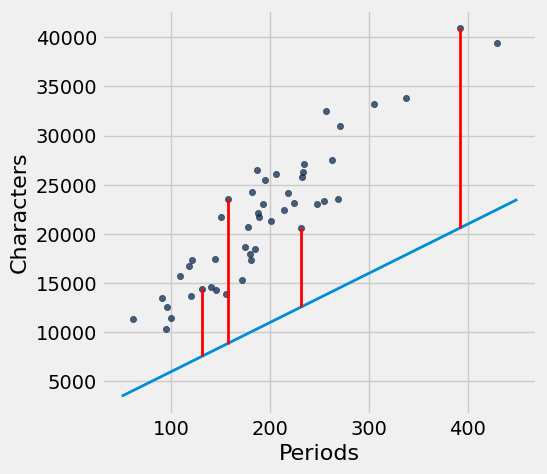

In [52]:
lw_rmse(50, 1000)

Slope:     -50 characters per period
Intercept: 20000 characters
Root mean squared error: 15556.9589915


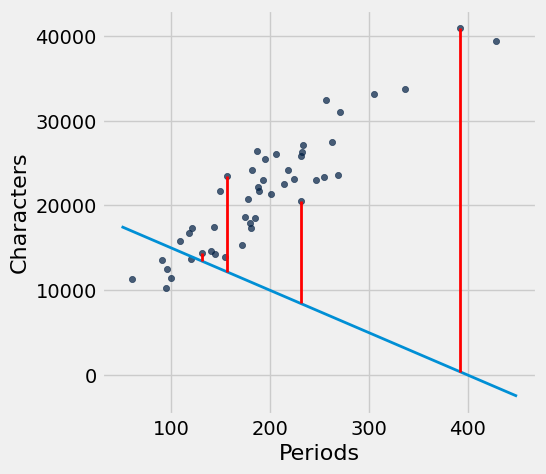

In [53]:
lw_rmse(-50, 20000)

Slope:     90 characters per period
Intercept: 4000 characters
Root mean squared error: 2715.53910638


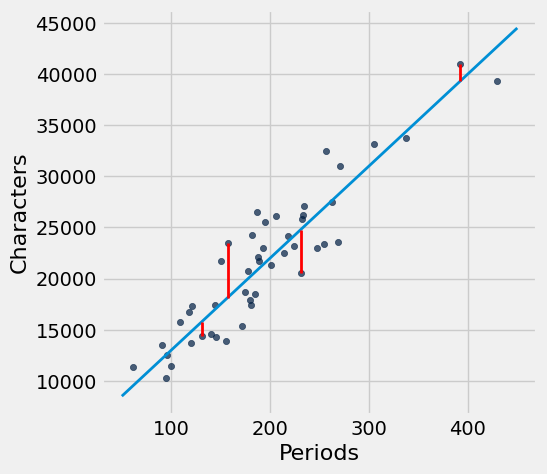

In [54]:
lw_rmse(90, 4000)

Slope:     87.0 characters per period
Intercept: 4745.0 characters
Root mean squared error: 2701.69078531


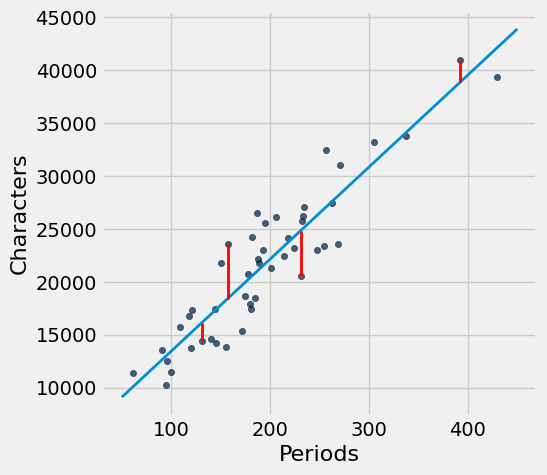

In [55]:
lw_slope = slope(little_women, 0, 1)
lw_intercept = intercept(little_women, 0, 1)
lw_rmse(lw_slope, lw_intercept)

## minimize( )

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
def f(x):
    return (x - 3) ** 2 + 1

What type of function is f(x)?  If you have recently taken algebra, you may recognize this as a quadratic function, or you may look at this and think "parabola".  You also might look at this and know from the equation where the vertex will be.  If you haven't recently taken algebra, that is ok! Let's visualize this function with a graph.   

In [ ]:
# make an array of values for x
x = np.arange(0,6,0.5)
#use our function to make an array of corresponding values for y
y = f(x)

In [ ]:
#make a table with a column for x and a column for y
points = Table().with_columns('x', x, 'f(x)', y)
#graph
points.plot('x', 'f(x)')

In [ ]:
[f(1), f(2), f(3), f(4), f(5)]

We can see that the when x = 3, y = f(x) = 1, which is the minimum value of this quadratic function.  Now let's use minimize() to see what Python would determine for the value of the argument we should pass to our function f that minimizes this function.

In [ ]:
minimize(f)

In [ ]:
f(minimize(f))

In [ ]:
f(3)

In [ ]:
f(3.1)

In [ ]:
f(2.9)

Now we are ready to show, using the minimize() function in Python, that the regression estimates for the slope and the intercept do in fact minimize the mse, and rmse:

In [ ]:
def lw_rmse_two(any_slope, any_intercept):
    x = little_women.column(0)
    y = little_women.column(1)
    predicted = any_slope * x + any_intercept
    mse = np.mean((y - predicted) ** 2)
    return mse 

In [ ]:
minimize(lw_rmse_two)

In [ ]:
slope(little_women, 0, 1)

In [ ]:
intercept(little_women, 0, 1)

## Residuals

In [56]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

# Below, t is a table; x and y are column indices or labels.

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

def fitted_values(t, x, y):
    """The fitted values along the regression line."""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [57]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
)

In [58]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [59]:
heights = heights.with_columns('Fitted', fitted_values(heights, 0, 1))
heights

MidParent,Child,Fitted
75.43,73.2,70.7124
75.43,69.2,70.7124
75.43,69,70.7124
75.43,69,70.7124
73.66,73.5,69.5842
73.66,72.5,69.5842
73.66,65.5,69.5842
73.66,65.5,69.5842
72.06,71,68.5645
72.06,68,68.5645


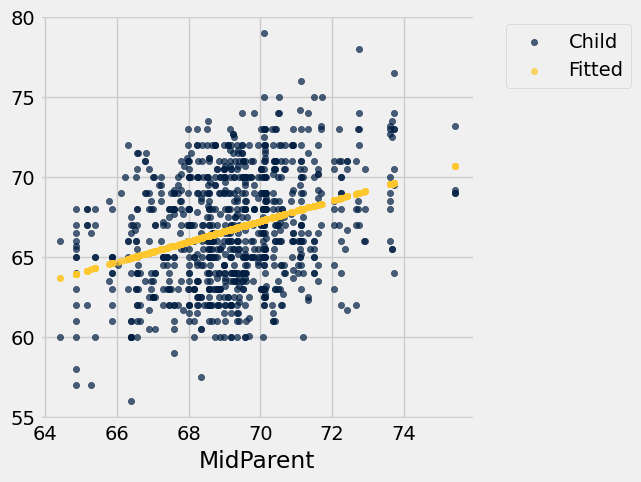

In [60]:
heights.scatter(0)

In [61]:
def residuals(t, x, y):
    return t.column(y) - fitted_values(t, x, y)

In [62]:
heights = heights.with_column('Residual', residuals(heights, 'MidParent', 'Child'))
heights

MidParent,Child,Fitted,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


In [63]:
#what is the average of the residuals?
np.average(heights.column('Residual'))

5.2567990407947457e-15

In [64]:
#what is the sd of the residuals?
np.std(heights.column('Residual'))

3.3880799163953426

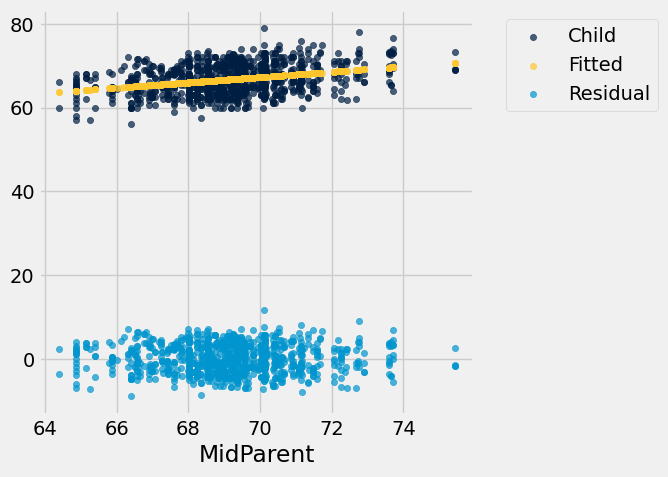

In [65]:
heights.scatter(0)

In [66]:
def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

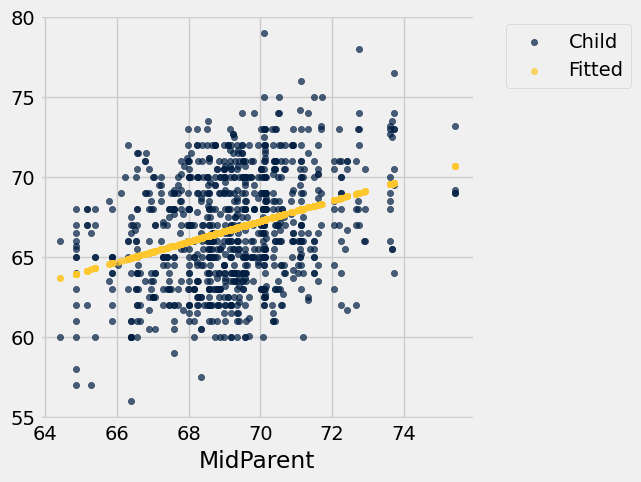

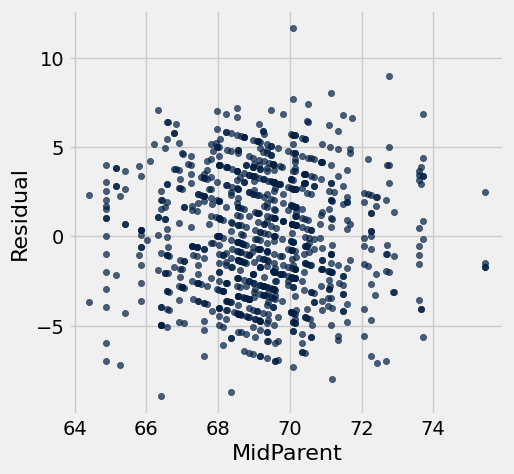

In [67]:
plot_residuals(heights, 'MidParent', 'Child')

## Regression Diagnostics

Nonlinearity

In [68]:
dugong = Table.read_table('dugong.csv')
dugong.show()

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [69]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

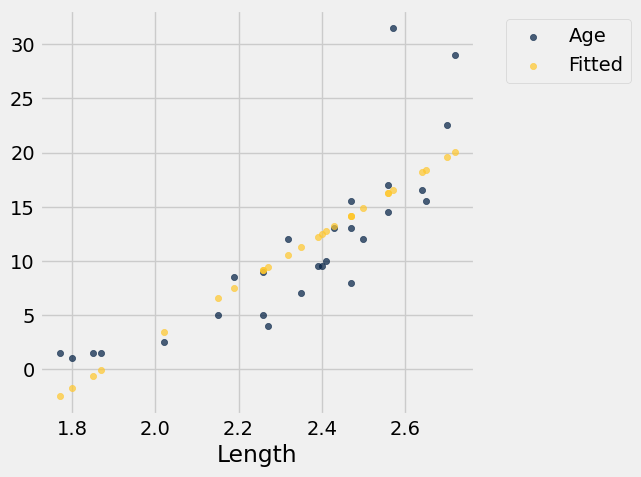

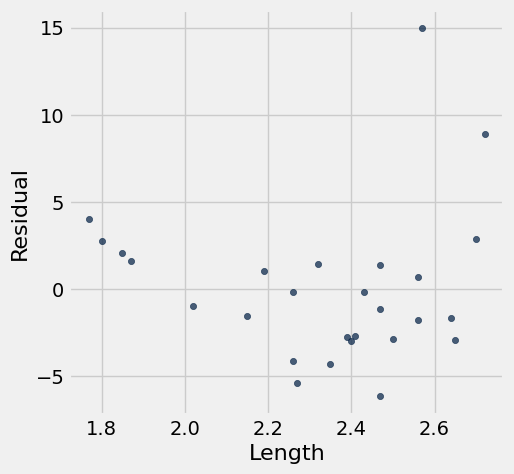

In [70]:
plot_residuals(dugong, 'Length', 'Age')

In [71]:
np.mean(residuals(dugong, 'Length', 'Age'))

8.1580832624307799e-15

In [72]:
np.std(residuals(dugong, 'Length', 'Age'))

4.3113328602881555

In [73]:
height_vs_average_weight = Table.read_table('us_women.csv')

In [74]:
height_vs_average_weight

height,ave weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


In [75]:
us_residuals = residuals(height_vs_average_weight, 0, 1)

In [76]:
sum(us_residuals)

2.8421709430404007e-14

In [77]:
correlation(height_vs_average_weight, 0, 1)

0.99549476778421608

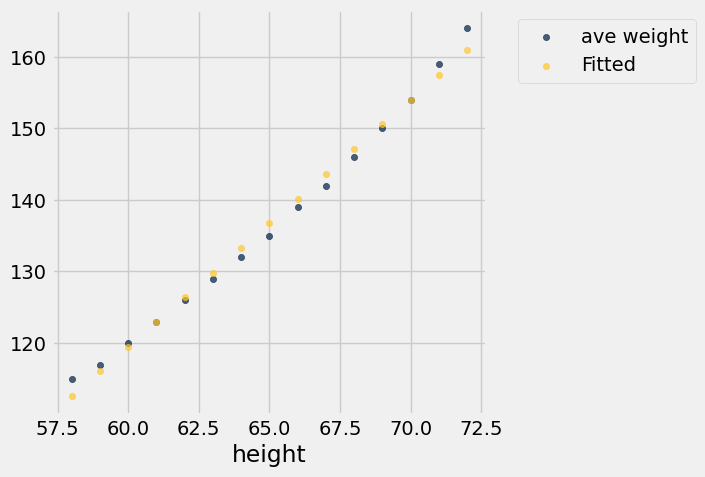

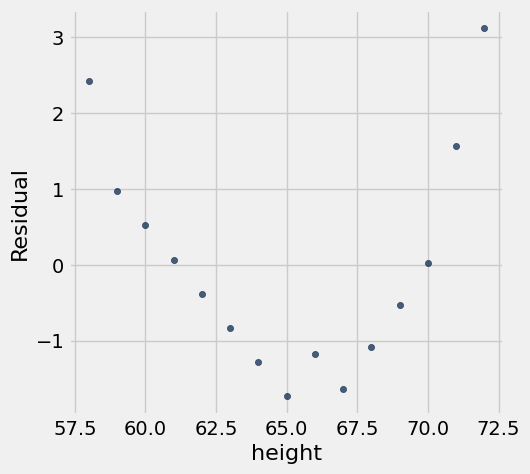

In [78]:
plot_residuals(height_vs_average_weight, 0, 1)

Back to slides

## A Measure of Clustering

In [ ]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

In [ ]:
def add_regression_to_table(t, x, y):
    """ Returns a new table with 'Fitted value' and 'Residual' columns added """
    t_with_extra_cols = t.with_columns(
        'Fitted value', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    return t_with_extra_cols

In [ ]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
)

heights = add_regression_to_table(
    heights, 'MidParent', 'Child'
)
heights

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')

In [ ]:
correlation(heights, 'MidParent', 'Child')

In [ ]:
correlation(heights, 'MidParent', 'Residual')

In [ ]:
correlation(heights, 'Residual', 'Fitted value')

In [ ]:
r_heights = correlation(heights, 'MidParent', 'Child')
r_heights

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

In [ ]:
sd_fitted = np.std(heights.column('Fitted value'))
sd_y = np.std(heights.column('Child'))
sd_fitted / sd_y , correlation(heights, 'MidParent', 'Child')

## SD of the Residuals

No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

In [ ]:
sd_residuals = np.std(residuals(heights, 'MidParent', 'Child'))

In [ ]:
r = correlation(heights, 'MidParent', 'Child')
sd_y = np.std(heights.column('Child'))
r, sd_y

In [ ]:
np.sqrt(1 - r**2) * sd_y, sd_residuals

## Linear regression functions thus far...

In [79]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

def add_regression_to_table(t, x, y):
    """ Returns a new table with 'Fitted value' and 'Residual' columns added """
    t_with_extra_cols = t.with_columns(
        'Fitted value', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    return t_with_extra_cols

## Regression Model ##

Let's start with creating a random data set based on a slope and intercept we believe are representative of a good model

In [80]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

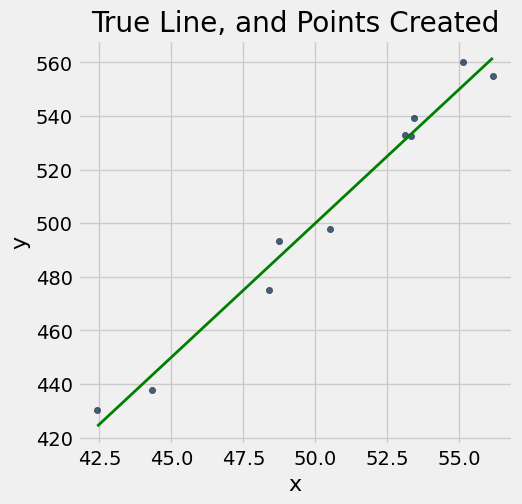

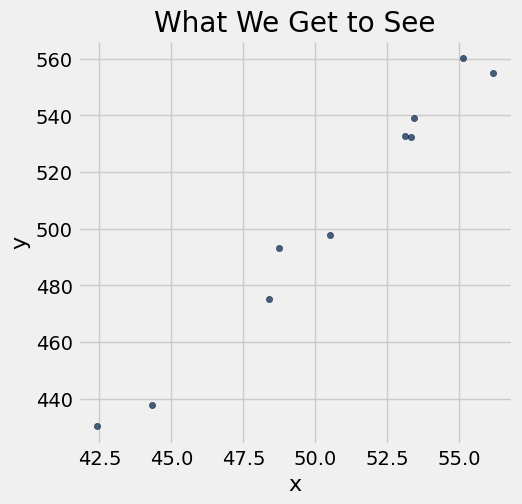

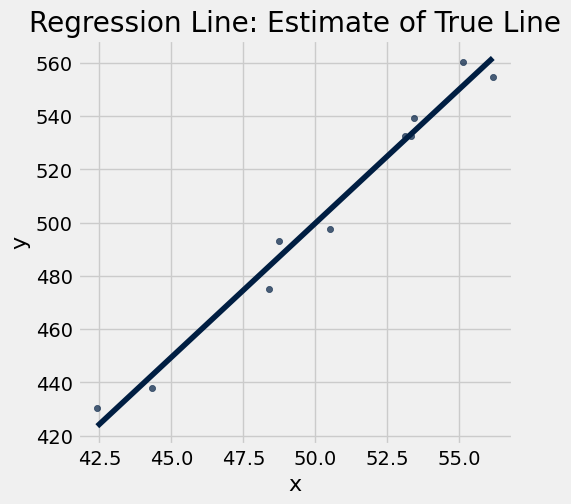

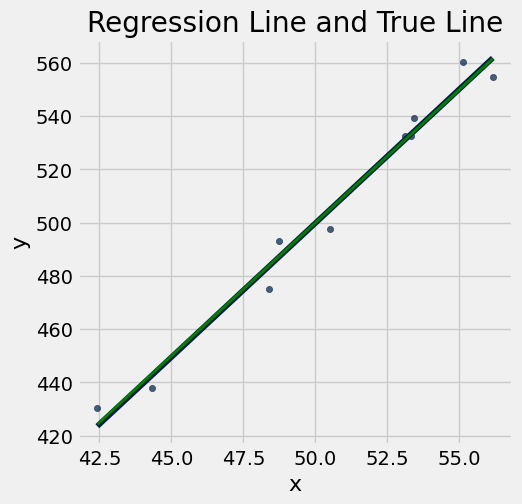

In [81]:
#draw_and_compare(true_slope, true_int, sample_size)
draw_and_compare(10, 0, 10)

## Prediction ##

In [82]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


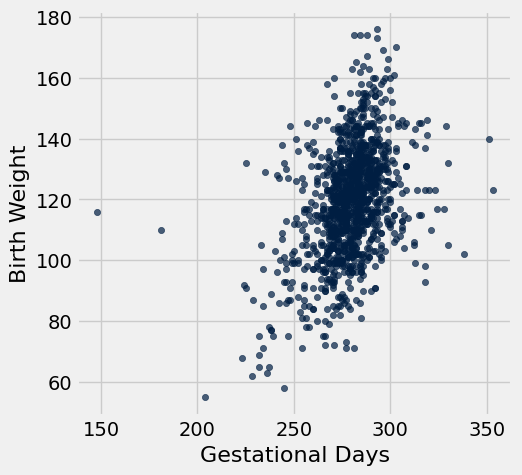

In [83]:
births.scatter('Gestational Days', 'Birth Weight')

In [84]:
births = births.where('Gestational Days', are.between(240, 320))

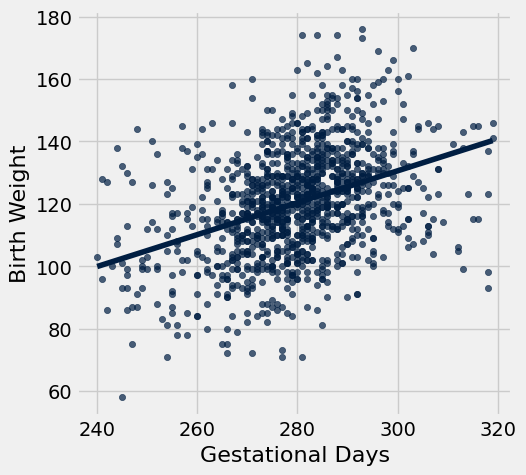

In [85]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [86]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [87]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.53859795467929

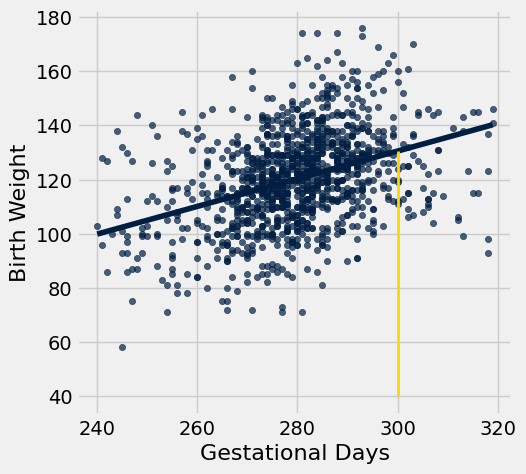

In [88]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='gold', lw=2);

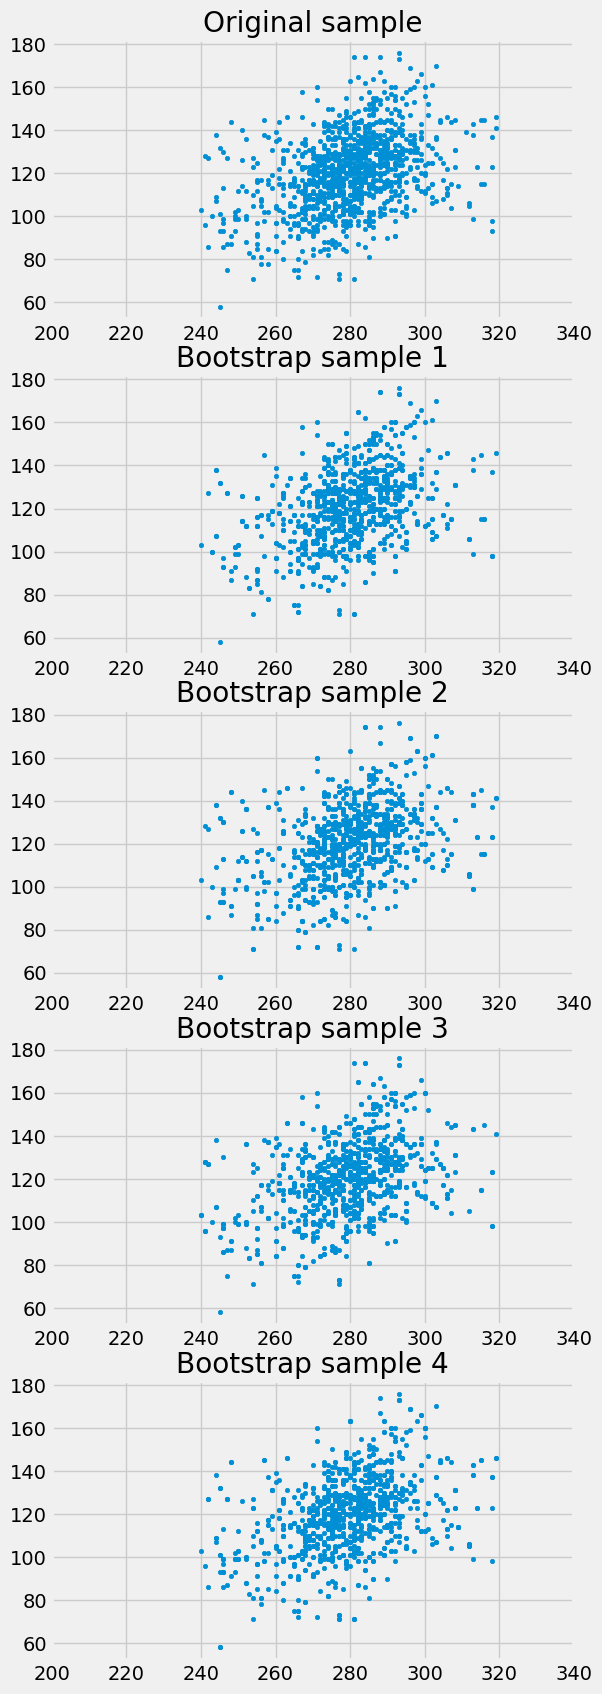

In [89]:
plots.figure(figsize=(6, 20))
plots.subplot(5, 1, 1)
plots.scatter(births[1], births[0], s=10)
plots.xlim([200, 340])
plots.title('Original sample')

for i in np.arange(1, 5, 1):
    plots.subplot(5,1,i+1)
    rep = births.sample()
    plots.scatter(rep[1], rep[0], s=10)
    plots.xlim([200, 340])
    plots.title('Bootstrap sample '+str(i))

Predicted y from bootstramp sample was 132.352386732
Predicted y from bootstramp sample was 130.790069143
Predicted y from bootstramp sample was 131.547953618
Predicted y from bootstramp sample was 130.865920592


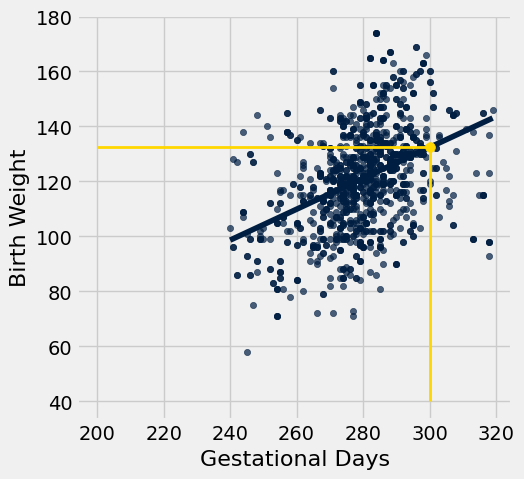

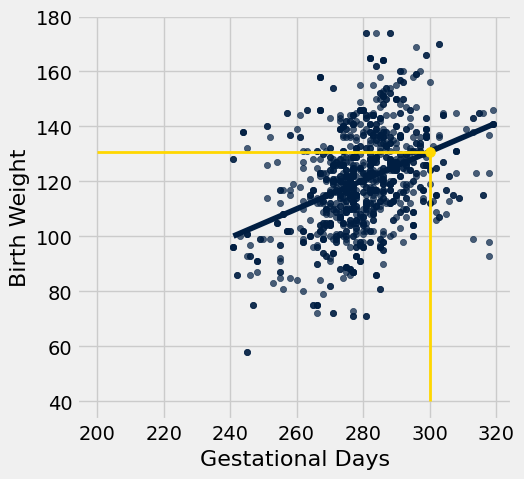

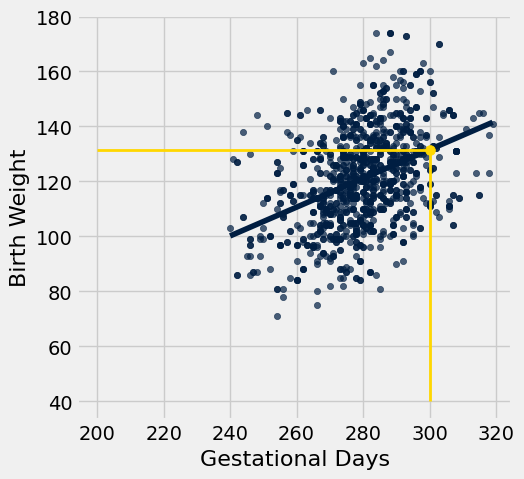

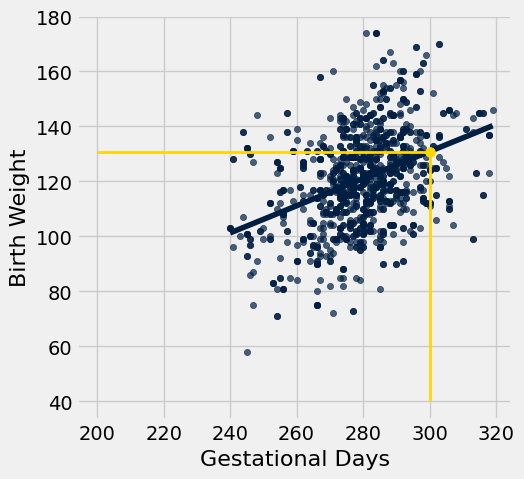

In [90]:
for i in np.arange(4):
    resample = births.sample()
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstramp sample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='gold', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='gold', lw=2);

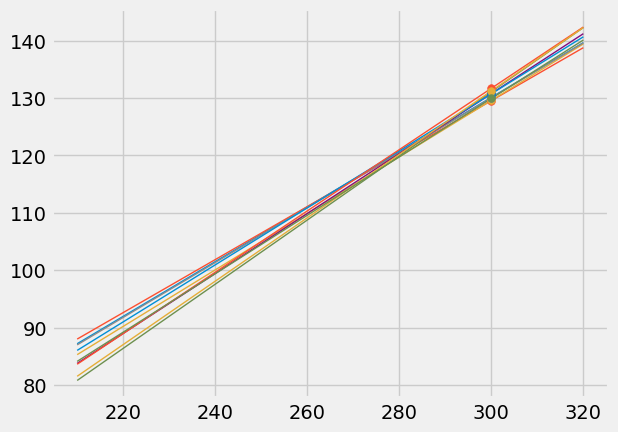

In [91]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

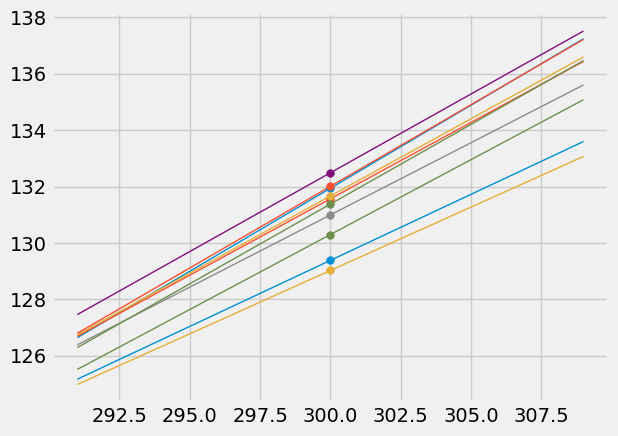

In [92]:
lines = Table(['slope','intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

slides

## Confidence Interval for Prediction ##

In [95]:
def bootstrap_prediction(t, x, y, new_x, repetitions=1000):

    # TODO: Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)
    
    # TODO: Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')') 

Approximate 95%-confidence interval for height of true line:
128.57585972 132.493884318 (width = 3.9180245981 )


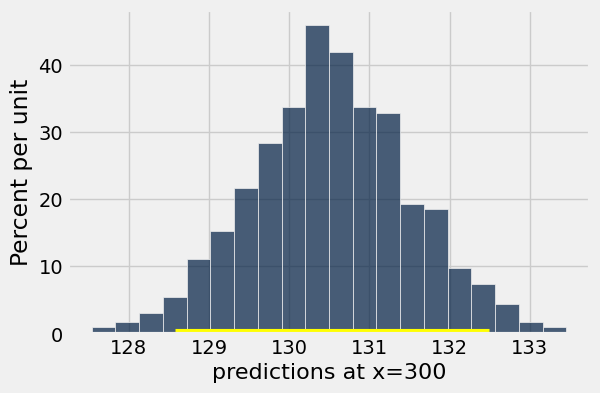

In [97]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

## Predictions at Different Values of X

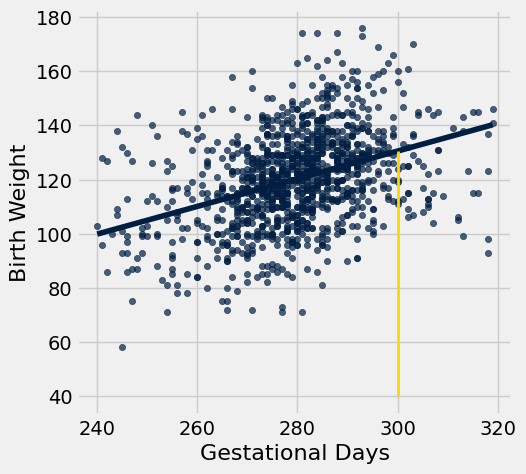

In [98]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='gold', lw=2);

Approximate 95%-confidence interval for height of true line:
78.6583597862 90.0754083287 (width = 11.4170485426 )


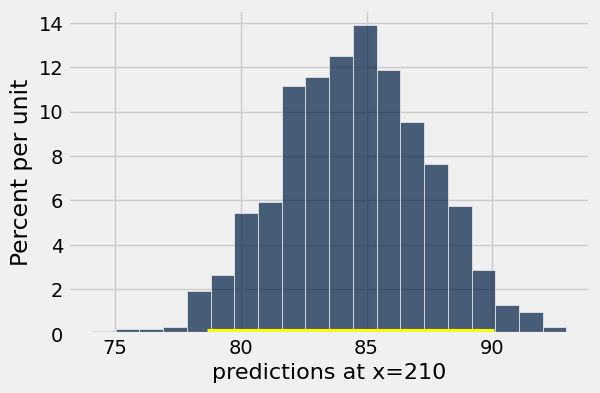

In [99]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 210)

Approximate 95%-confidence interval for height of true line:
119.323534981 121.298124214 (width = 1.97458923331 )


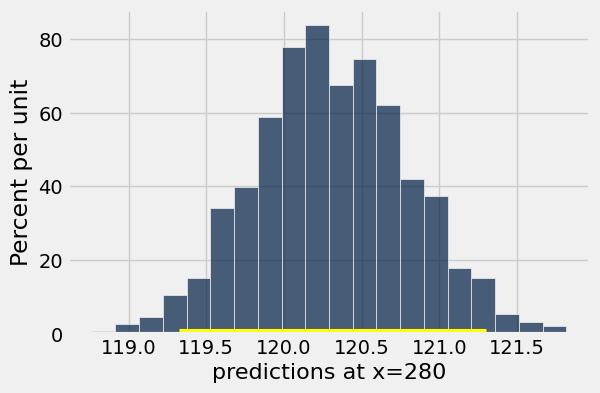

In [100]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

In [101]:
np.mean(births.column('Gestational Days'))

279.72080772607552

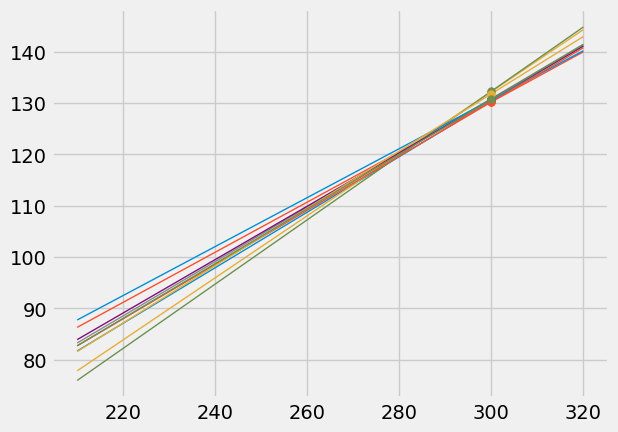

In [102]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

## Inference for the Slope ##

In [ ]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [ ]:
slope(births, 'Gestational Days', 'Birth Weight')

In [ ]:
def bootstrap_slope(t, x, y, repetitions=5000):
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(left, 'to', right)

In [ ]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight', 2500)

## Rain on the Regression Parade

In [ ]:
draw_and_compare(0, 10, 25)

**Null Hypothesis.** Slope of true line = 0.

**Alternative Hypothesis.** Slope of true line is not 0.

In [ ]:
slope(births, 'Maternal Age', 'Birth Weight')

In [ ]:
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

In [ ]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight', 2500)